In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
plt.rcParams['figure.figsize'] = (8, 6)

In [3]:
housing = pd.read_csv('./data/housing.csv')
housing.sample(10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
3552     -118.61     34.23                26.0       3727.0           572.0   
6117     -117.90     34.12                35.0        957.0           194.0   
689      -122.12     37.70                41.0       3495.0           787.0   
13729    -117.17     34.05                29.0       4007.0           700.0   
8468     -118.33     33.91                 8.0      10731.0          3335.0   
2645     -124.14     40.57                29.0       2864.0           600.0   
10655    -117.82     33.67                15.0       1010.0           274.0   
19441    -121.01     37.68                33.0       3230.0           587.0   
1794     -122.41     37.94                52.0        154.0            33.0   
16247    -121.27     37.98                43.0       1005.0           200.0   

       population  households  median_income  median_house_value  \
3552       1724.0       530.0         6.1419            327300.0   
6117        804.0       221.0         3.3322            151400.0   
689        1849.0       750.0         2.6790            144900.0   
13729      1576.0       696.0         3.1801            149300.0   
8468       7211.0      3028.0         2.4550            192700.0   
2645       1314.0       562.0         2.1354             75100.0   
10655       649.0       261.0         2.5197            350000.0   
19441      1579.0       560.0         3.5775            109700.0   
1794         89.0        38.0         3.2875            275000.0   
16247       492.0       172.0         2.6812             72800.0   

      ocean_proximity  
3552        <1H OCEAN  
6117        <1H OCEAN  
689          NEAR BAY  
13729          INLAND  
8468        <1H OCEAN  
2645        <1H OCEAN  
10655       <1H OCEAN  
19441          INLAND  
1794         NEAR BAY  
16247          INLAND

### Vokabel

* Spalten(`longitude`, `latitude`, ...) -> *Features*
* Zeilen -> *Observations*
* Tabelle -> *DataFrame*

### Explorative Data Analysis

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


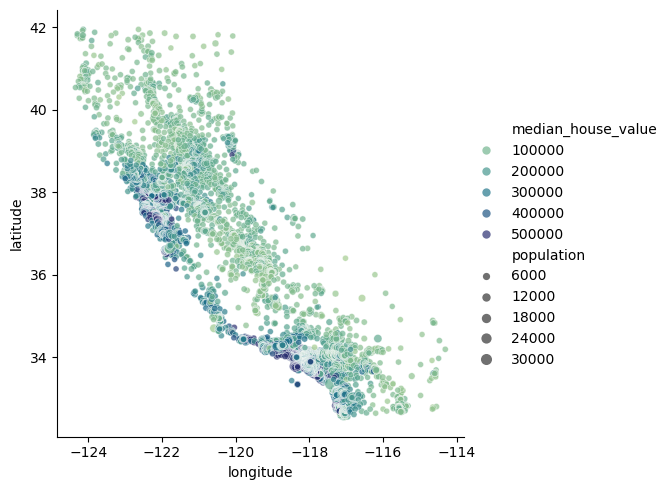

In [5]:
sns.relplot(data=housing,
            x='longitude',
            y='latitude',
            size='population',
            alpha=0.7,
            hue='median_house_value',
            palette='crest')

<Axes: xlabel='median_house_value', ylabel='Count'>

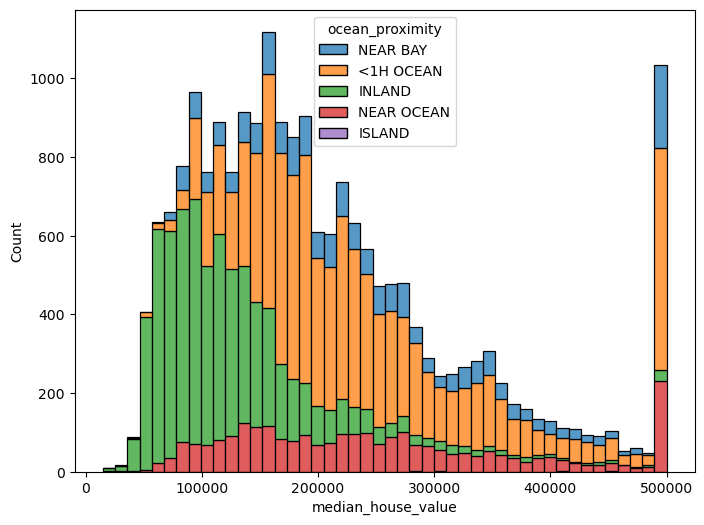

In [6]:
sns.histplot(data=housing, x='median_house_value', hue='ocean_proximity', multiple='stack')

<Axes: xlabel='median_income', ylabel='Count'>

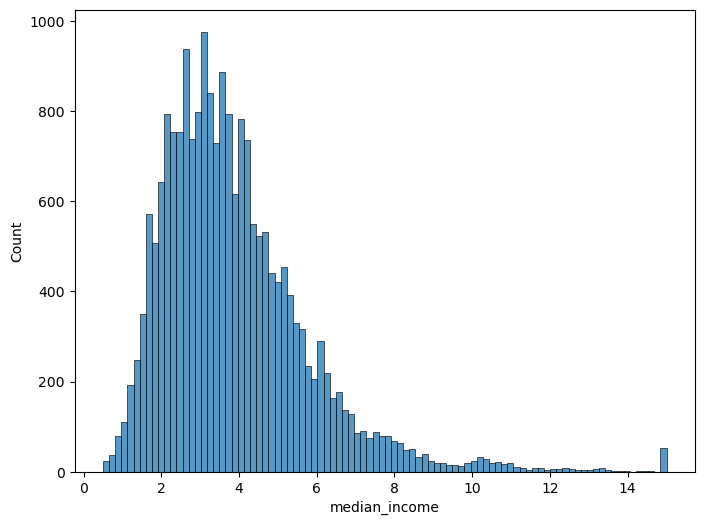

In [7]:
sns.histplot(housing['median_income'])

### Korrelation

Der Korrelationskoeffizient **r** gibt die Stärke des **linearen** Zusammenhangs zwischen 2 features an

![Korrelation](https://upload.wikimedia.org/wikipedia/commons/0/02/Correlation_examples.png)

<Axes: >

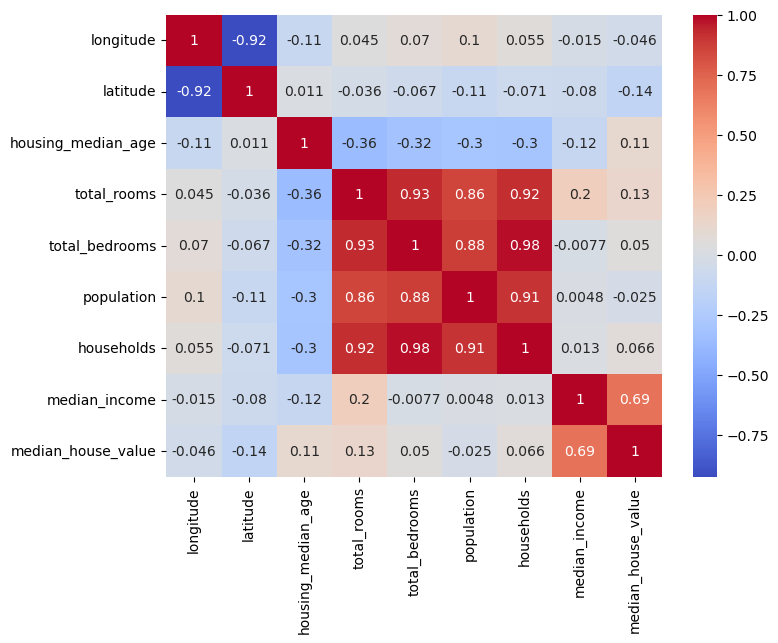

In [8]:
corr = housing.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')

### Training

1. model erzeugen
2. model an Trainingsdaten fitten
3. model evaluieren

y = model(X)

In [9]:
X = housing[['median_income']]
y = housing.median_house_value

<Axes: xlabel='median_income', ylabel='median_house_value'>

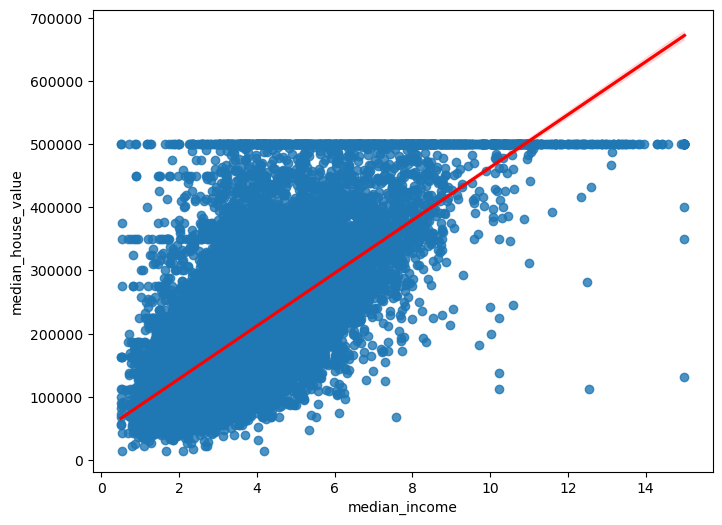

In [10]:
sns.regplot(x=X, y=y, line_kws = {'color': 'red'})

### Linear Regression

Finden einer Gerade, welche den Fehler minimiert
![Fehler](./assets/mse.png)
[gif](http://cdn-images-1.medium.com/max/640/1*eeIvlwkMNG1wSmj3FR6M2g.gif)

In [18]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [19]:
model.intercept_

45085.57670326796

In [13]:
model.coef_

array([41793.8492019])

In [14]:
model.predict([[1], [2], [4]])

/opt/homebrew/Caskroom/miniconda/base/envs/dsai/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([  3291.72750137, 128673.27510706, 212260.97351085])

### Evaluierung?

Unmöglich, keine Daten -> train_test_split